In [239]:
import numpy as np
import pandas as pd 
df = pd.read_csv("t.csv")

/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/2021694079.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("t.csv")


In [240]:
df = df[['DAY OF MONTH','HOUR OF DAY','DAY OF WEEK','MONTH','CONTACTED','DISPOSITION','TALK TIME','HALF HOUR','MEMBER_AGE','STATE SOLD','MEMBER_LANGUAGE']]

In [241]:
df.describe()

,DAY OF MONTH,HOUR OF DAY,CONTACTED,MEMBER_AGE
count,822364.000000,822364.000000,822364.000000,822364.000000
mean,15.963657,17.175837,0.228030,49.652856
std,8.574554,4.049814,0.419563,16.218355
min,1.000000,0.000000,0.000000,1.000000
25%,9.000000,15.000000,0.000000,39.000000
50%,16.000000,17.000000,0.000000,54.000000
75%,23.000000,20.000000,0.000000,62.000000
max,31.000000,23.000000,1.000000,103.000000


In [242]:
total_minutes = []

# Loop over each time string
for time_str in df['TALK TIME']:
    # Check if the time string is empty or missing
    if pd.isnull(time_str) or time_str == '':
        # Append blank value for empty or missing time
        total_minutes.append('')
    else:
        # Split the time string into hours, minutes, and seconds
        hours, minutes, seconds = map(int, time_str.split(":"))
        
        # Calculate total minutes and convert to decimal format
        total_min = hours * 60 + minutes + seconds / 60
        
        # Append the total minutes to the list
        total_minutes.append(round(total_min, 2))

# Add the converted minute values to the DataFrame as a new column
df['total_minutes'] = total_minutes

In [243]:
df.head(100)

,DAY OF MONTH,HOUR OF DAY,DAY OF WEEK,MONTH,CONTACTED,DISPOSITION,TALK TIME,HALF HOUR,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes
0,1,15,Thursday,June,0,Answering Machine,NaN,15:00,2,VA,English (Default),
1,1,15,Thursday,June,0,Answering Machine,NaN,15:30,41,VA,English (Default),
2,1,17,Thursday,June,0,Answering Machine,NaN,17:30,65,TN,English (Default),
3,1,13,Thursday,June,0,No Answer,NaN,13:00,16,OH,English (Default),
4,1,15,Thursday,June,0,Answering Machine,NaN,15:00,35,OH,English (Default),
...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,18,Monday,June,0,Operator Intercept,NaN,18:30,55,GA,UNDETERMINED,
96,19,18,Monday,June,1,Left Voicemail,00:00:07,18:30,66,GA,English (Default),0.12
97,19,19,Monday,June,0,Answering Machine,NaN,19:30,54,GA,UNDETERMINED,
98,19,20,Monday,June,0,Answering Machine,NaN,20:30,46,GA,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,


In [244]:
df

,DAY OF MONTH,HOUR OF DAY,DAY OF WEEK,MONTH,CONTACTED,DISPOSITION,TALK TIME,HALF HOUR,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes
0,1,15,Thursday,June,0,Answering Machine,NaN,15:00,2,VA,English (Default),
1,1,15,Thursday,June,0,Answering Machine,NaN,15:30,41,VA,English (Default),
2,1,17,Thursday,June,0,Answering Machine,NaN,17:30,65,TN,English (Default),
3,1,13,Thursday,June,0,No Answer,NaN,13:00,16,OH,English (Default),
4,1,15,Thursday,June,0,Answering Machine,NaN,15:00,35,OH,English (Default),
...,...,...,...,...,...,...,...,...,...,...,...,...
822359,27,14,Saturday,January,0,Answering Machine,NaN,14:00,69,KY,English (Default),
822360,27,14,Saturday,January,1,Left Voicemail,00:00:39,14:00,58,KY,English (Default),0.65
822361,27,14,Saturday,January,0,Answering Machine,NaN,14:00,30,KY,English (Default),
822362,27,14,Saturday,January,0,Answering Machine,NaN,14:00,65,KY,Undetermined,


In [245]:
df.drop(columns=['TALK TIME'], inplace=True)

In [246]:
df2=df[df['CONTACTED'] == 1]

In [247]:
# Create the 'DISPOSITION_BINARY' column using numpy.where() with multiple conditions
df2['DISPOSITION_BINARY'] = np.where(
    (df2['DISPOSITION'] == 'Successful Contact - Assessment') | 
    (df2['DISPOSITION'] == 'Successful Contact - Visit Schedule'), 
    1, 
    0
)


/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/1548661310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DISPOSITION_BINARY'] = np.where(


In [248]:
df2.drop(columns=['DISPOSITION'], inplace=True)

/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/3209665981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['DISPOSITION'], inplace=True)


In [249]:
df2

,DAY OF MONTH,HOUR OF DAY,DAY OF WEEK,MONTH,CONTACTED,HALF HOUR,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes,DISPOSITION_BINARY
5,2,13,Friday,June,1,13:00,2,VA,English (Default),0.08,0
8,6,13,Tuesday,June,1,13:00,2,VA,English (Default),0.1,0
9,6,17,Tuesday,June,1,17:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.1,0
11,7,14,Wednesday,June,1,14:30,72,IN,English (Default),5.78,1
12,7,12,Wednesday,June,1,12:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...
822342,27,14,Saturday,January,1,14:30,26,VA,English (Default),0.1,0
822349,27,16,Saturday,January,1,16:00,33,VA,English (Default),0.52,0
822356,27,21,Saturday,January,1,21:00,64,VA,English (Default),0.18,0
822358,27,20,Saturday,January,1,20:00,63,NV,English (Default),0.35,0


In [250]:
# Create a new column 'WEEKEND' based on 'DAY OF WEEK'
df2['WEEKEND'] = df2['DAY OF WEEK'].apply(lambda x: 1 if x.lower() in ['saturday', 'sunday'] else 0)
df2.drop(columns=['DAY OF WEEK'], inplace=True)


/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/2952593599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['WEEKEND'] = df2['DAY OF WEEK'].apply(lambda x: 1 if x.lower() in ['saturday', 'sunday'] else 0)
/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/2952593599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['DAY OF WEEK'], inplace=True)


In [251]:
df2

,DAY OF MONTH,HOUR OF DAY,MONTH,CONTACTED,HALF HOUR,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes,DISPOSITION_BINARY,WEEKEND
5,2,13,June,1,13:00,2,VA,English (Default),0.08,0,0
8,6,13,June,1,13:00,2,VA,English (Default),0.1,0,0
9,6,17,June,1,17:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.1,0,0
11,7,14,June,1,14:30,72,IN,English (Default),5.78,1,0
12,7,12,June,1,12:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.08,0,0
...,...,...,...,...,...,...,...,...,...,...,...
822342,27,14,January,1,14:30,26,VA,English (Default),0.1,0,1
822349,27,16,January,1,16:00,33,VA,English (Default),0.52,0,1
822356,27,21,January,1,21:00,64,VA,English (Default),0.18,0,1
822358,27,20,January,1,20:00,63,NV,English (Default),0.35,0,1


In [252]:
# Create a new column 'MONTH_BINARY' based on 'MONTH'
df2['MONTH_BINARY'] = df2['MONTH'].apply(lambda x: 1 if x in ['January', 'November', 'December'] else 0)

/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/3691063708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MONTH_BINARY'] = df2['MONTH'].apply(lambda x: 1 if x in ['January', 'November', 'December'] else 0)


In [253]:
df2.drop(columns=['MONTH'], inplace=True)

/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/1474133652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['MONTH'], inplace=True)


In [254]:
df2

,DAY OF MONTH,HOUR OF DAY,CONTACTED,HALF HOUR,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes,DISPOSITION_BINARY,WEEKEND,MONTH_BINARY
5,2,13,1,13:00,2,VA,English (Default),0.08,0,0,0
8,6,13,1,13:00,2,VA,English (Default),0.1,0,0,0
9,6,17,1,17:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.1,0,0,0
11,7,14,1,14:30,72,IN,English (Default),5.78,1,0,0
12,7,12,1,12:30,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.08,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
822342,27,14,1,14:30,26,VA,English (Default),0.1,0,1,1
822349,27,16,1,16:00,33,VA,English (Default),0.52,0,1,1
822356,27,21,1,21:00,64,VA,English (Default),0.18,0,1,1
822358,27,20,1,20:00,63,NV,English (Default),0.35,0,1,1


In [255]:
# Define a function to categorize the hour of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'HOUR OF DAY' column and create a new column 'TIME_CATEGORY'
df2['TIME_CATEGORY'] = df2['HOUR OF DAY'].apply(categorize_hour)


/var/folders/w0/k22ts2b57gz7pylcs2kt2nr80000gn/T/ipykernel_11411/761268130.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIME_CATEGORY'] = df2['HOUR OF DAY'].apply(categorize_hour)


In [256]:
# Perform one-hot encoding for the 'TIME_CATEGORY' column
one_hot_encoded = pd.get_dummies(df2['TIME_CATEGORY'], prefix='TIME')

# Replace all non-zero values with 1
one_hot_encoded = one_hot_encoded.applymap(lambda x: 1 if x > 0 else 0)

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df2, one_hot_encoded], axis=1)

# Drop the original 'TIME_CATEGORY' column
df_encoded.drop(columns=['TIME_CATEGORY'], inplace=True)


df_encoded.drop(columns=['HALF HOUR','HOUR OF DAY'], inplace=True)
df_encoded

,DAY OF MONTH,CONTACTED,MEMBER_AGE,STATE SOLD,MEMBER_LANGUAGE,total_minutes,DISPOSITION_BINARY,WEEKEND,MONTH_BINARY,TIME_Evening,TIME_Morning,TIME_Night,TIME_Noon
5,2,1,2,VA,English (Default),0.08,0,0,0,0,0,0,1
8,6,1,2,VA,English (Default),0.1,0,0,0,0,0,0,1
9,6,1,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.1,0,0,0,1,0,0,0
11,7,1,72,IN,English (Default),5.78,1,0,0,0,0,0,1
12,7,1,37,OH,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.08,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822342,27,1,26,VA,English (Default),0.1,0,1,1,0,0,0,1
822349,27,1,33,VA,English (Default),0.52,0,1,1,0,0,0,1
822356,27,1,64,VA,English (Default),0.18,0,1,1,0,0,1,0
822358,27,1,63,NV,English (Default),0.35,0,1,1,1,0,0,0


In [257]:
# Define a mapping of states to their corresponding regions
state_to_region = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West', 'CO': 'West', 'AZ': 'West', 'NM': 'West', 'AK': 'West', 'HI': 'West',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'PA': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'CT': 'Northeast', 'RI': 'Northeast', 'MA': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast',
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South', 'LA': 'South', 'AR': 'South', 'TX': 'South', 'OK': 'South'
}

# Map the states to their corresponding regions
df_encoded['REGION'] = df_encoded['STATE SOLD'].map(state_to_region)

# Perform one-hot encoding for the 'REGION' column
one_hot_encoded_regions = pd.get_dummies(df_encoded['REGION'], prefix='REGION')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded, one_hot_encoded_regions], axis=1)

# Replace non-zero values with 1 in the one-hot encoded columns
for column in one_hot_encoded_regions.columns:
    df_encoded[column] = (df_encoded[column] != 0).astype(int)



In [258]:
df_encoded.drop(columns=['STATE SOLD', 'REGION'], inplace=True)
df_encoded


,DAY OF MONTH,CONTACTED,MEMBER_AGE,MEMBER_LANGUAGE,total_minutes,DISPOSITION_BINARY,WEEKEND,MONTH_BINARY,TIME_Evening,TIME_Morning,TIME_Night,TIME_Noon,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West
5,2,1,2,English (Default),0.08,0,0,0,0,0,0,1,0,0,1,0
8,6,1,2,English (Default),0.1,0,0,0,0,0,0,1,0,0,1,0
9,6,1,37,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.1,0,0,0,1,0,0,0,1,0,0,0
11,7,1,72,English (Default),5.78,1,0,0,0,0,0,1,1,0,0,0
12,7,1,37,SOURCE CODE VALUE NOT FOUND ON CROSSWALK TABLE,0.08,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822342,27,1,26,English (Default),0.1,0,1,1,0,0,0,1,0,0,1,0
822349,27,1,33,English (Default),0.52,0,1,1,0,0,0,1,0,0,1,0
822356,27,1,64,English (Default),0.18,0,1,1,0,0,1,0,0,0,1,0
822358,27,1,63,English (Default),0.35,0,1,1,1,0,0,0,0,0,0,1


In [259]:
# Apply lambda function to create a new binary column
df_encoded['MEMBER_LANGUAGE_BINARY'] = df_encoded['MEMBER_LANGUAGE'].apply(lambda x: 1 if x.lower() in ['english', 'english (default)'] else 0)

# Drop the original 'MEMBER_LANGUAGE' column
df_encoded.drop(columns=['MEMBER_LANGUAGE'], inplace=True)
df_encoded.drop(columns=['CONTACTED'], inplace=True)

In [260]:
df_encoded

,DAY OF MONTH,MEMBER_AGE,total_minutes,DISPOSITION_BINARY,WEEKEND,MONTH_BINARY,TIME_Evening,TIME_Morning,TIME_Night,TIME_Noon,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West,MEMBER_LANGUAGE_BINARY
5,2,2,0.08,0,0,0,0,0,0,1,0,0,1,0,1
8,6,2,0.1,0,0,0,0,0,0,1,0,0,1,0,1
9,6,37,0.1,0,0,0,1,0,0,0,1,0,0,0,0
11,7,72,5.78,1,0,0,0,0,0,1,1,0,0,0,1
12,7,37,0.08,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822342,27,26,0.1,0,1,1,0,0,0,1,0,0,1,0,1
822349,27,33,0.52,0,1,1,0,0,0,1,0,0,1,0,1
822356,27,64,0.18,0,1,1,0,0,1,0,0,0,1,0,1
822358,27,63,0.35,0,1,1,1,0,0,0,0,0,0,1,1


In [289]:
import sklearn
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['DISPOSITION_BINARY'])
y= df_encoded.DISPOSITION_BINARY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [290]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [291]:
y_test_pred = logreg.predict(X_test)
## compare if pred is the same as observed, ==
y_test == y_test_pred # true or false

# acc: # true/# total y test sample
acc_manual = np.sum(y_test == y_test_pred) / y_test.shape[0]
print(acc_manual)

0.9609348813115154


In [292]:
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

array([[56622,   423],
       [ 2141,  6448]])

In [293]:
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 6448
TN is: 56622
FP is: 423
FN is: 2141


In [294]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("accuracy",sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("precision",sklearn.metrics.precision_score(y_test,y_test_pred))
print("recall",sklearn.metrics.recall_score(y_test,y_test_pred))
print("f1",sklearn.metrics.f1_score(y_test,y_test_pred))

accuracy 0.9609348813115154
precision 0.9384369087469073
recall 0.7507276749330539
f1 0.8341526520051747


Text(0, 0.5, 'Precision')

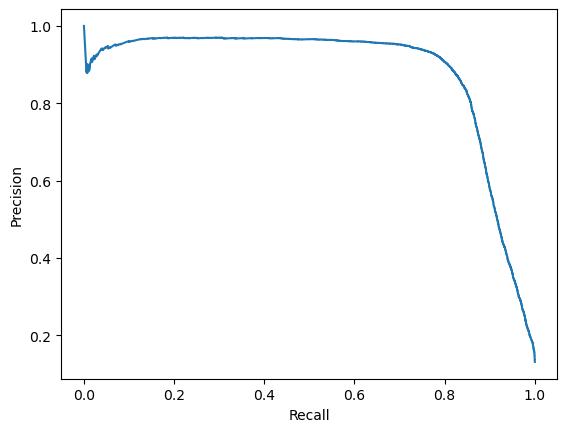

In [295]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
pred_prob = logreg.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [296]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: y_pred_proba



print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob)  )

AUC for logistic regression: 0.9627008225914506


Text(0, 0.5, 'TPR')

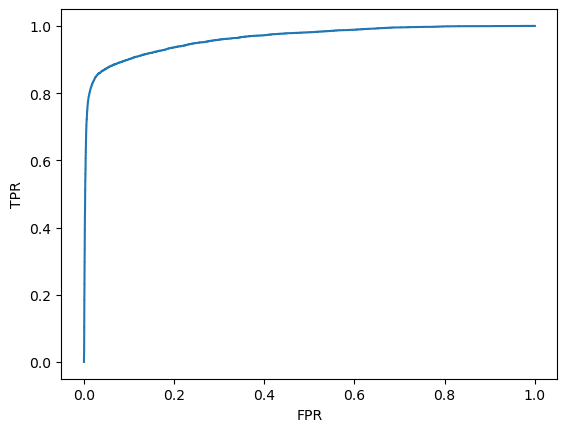

In [297]:
from sklearn.metrics import roc_curve

# Predicted Probability: pred_proba
# Get Measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)
# Generate Figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [298]:
coefficients = logreg.coef_[0]

# Calculate feature importance (absolute values of coefficients)
feature_importance = np.abs(coefficients)

# Print feature importance
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

DAY OF MONTH: 0.0066045867926180415
MEMBER_AGE: 0.009106137042768204
total_minutes: 0.6675677709106637
WEEKEND: 0.13432540559449366
MONTH_BINARY: 0.21177705603451288
TIME_Evening: 0.6418873025761344
TIME_Morning: 0.003397522375895873
TIME_Night: 0.9805145965828036
TIME_Noon: 0.40012992386574947
REGION_Midwest: 0.07301922349292626
REGION_Northeast: 0.030693442564592843
REGION_South: 0.4319624760250217
REGION_West: 1.3871878450509432
MEMBER_LANGUAGE_BINARY: 0.02473392462470228
